In [1]:
from qiskit_ibm_provider import IBMProvider
with open('../ibm_API_key','r') as file:
    token = file.readline()

provider = IBMProvider(token=token, instance="ibm-q-ncsu/nc-state/quantum-compiler")

In [12]:
import pandas as pd

data_lines = []
for N in range(4,7):
    for T in range(1,4):
        for noise in range(1,13,2):
            data = {'N' : N, 'T':T,'Noise':noise}
            data_lines.append(data)

df = pd.DataFrame(data_lines)

job_ids = [
    "cna13m6m2pvg008sktx0",
    "cna13nyyzmv0008w8t10",
    "cna13q6m2pvg008sktxg",
    "cna13rfj5tjg0080xg9g",
    "cna13sz1m2c0008wypqg",
    "cna13v7yzmv0008w8t1g",
    "cna151m1m2c0008wypxg",
    "cna152m8ff30008rjhp0",
    "cna153wj5tjg0080xgcg",
    "cna155mr0vyg008d7zpg",
    "cna156wj5tjg0080xgd0",
    "cna158dyzmv0008w8t20",
    "cna15wf1m2c0008wypy0",
    "cna15xzj5tjg0080xgeg",
    "cna15z7j5tjg0080xgf0",
    "cna1600r0vyg008d7zqg",
    "cna16188ff30008rjhsg",
    "cna162g1m2c0008wypyg",
    "cna173mr0vyg008d7zrg",
    "cna174wj5tjg0080xgh0",
    "cna175wr0vyg008d7zs0",
    "cna177c8ff30008rjhwg",
    "cna178x1m2c0008wypzg",
    "cna17an8ff30008rjhx0",
    "cna1944m2pvg008skvag",
    "cna195cr0vyg008d7zx0",
    "cna196m8ff30008rjj1g",
    "cna197w8ff30008rjj20",
    "cna1995r0vyg008d7zxg",
    "cna19anr0vyg008d7zy0",
    "cna19t71m2c0008wyq20",
    "cna19vf1m2c0008wyq2g",
    "cna19wzj5tjg0080xgp0",
    "cna19y7j5tjg0080xgpg",
    "cna19zfyzmv0008w8t6g",
    "cna1a0r1m2c0008wyq30",
    "cna1ahaj5tjg0080xgqg",
    "cna1ajaj5tjg0080xgr0",
    "cna1akjm2pvg008skvd0",
    "cna1an2yzmv0008w8t80",
    "cna1ap28ff30008rjj4g",
    "cna1apt8ff30008rjj5g",
    "cna1b34r0vyg008d8010",
    "cna1b4c1m2c0008wyq4g",
    "cna1b5w1m2c0008wyq5g",
    "cna1b74r0vyg008d801g",
    "cna1b85j5tjg0080xgsg",
    "cna1b9dr0vyg008d8020",
    "cna1br7m2pvg008skvh0",
    "cna1bsf1m2c0008wyq80",
    "cna1btq8ff30008rjja0",
    "cna1bvz1m2c0008wyq90",
    "cna1bwz8ff30008rjjag",
    "cna1bxz8ff30008rjjb0"
]

df['Job Id'] = job_ids

In [24]:
print(df)

    N  T  Noise                Job Id  \
0   4  1      1  cna13m6m2pvg008sktx0   
1   4  1      3  cna13nyyzmv0008w8t10   
2   4  1      5  cna13q6m2pvg008sktxg   
3   4  1      7  cna13rfj5tjg0080xg9g   
4   4  1      9  cna13sz1m2c0008wypqg   
5   4  1     11  cna13v7yzmv0008w8t1g   
6   4  2      1  cna151m1m2c0008wypxg   
7   4  2      3  cna152m8ff30008rjhp0   
8   4  2      5  cna153wj5tjg0080xgcg   
9   4  2      7  cna155mr0vyg008d7zpg   
10  4  2      9  cna156wj5tjg0080xgd0   
11  4  2     11  cna158dyzmv0008w8t20   
12  4  3      1  cna15wf1m2c0008wypy0   
13  4  3      3  cna15xzj5tjg0080xgeg   
14  4  3      5  cna15z7j5tjg0080xgf0   
15  4  3      7  cna1600r0vyg008d7zqg   
16  4  3      9  cna16188ff30008rjhsg   
17  4  3     11  cna162g1m2c0008wypyg   
18  5  1      1  cna173mr0vyg008d7zrg   
19  5  1      3  cna174wj5tjg0080xgh0   
20  5  1      5  cna175wr0vyg008d7zs0   
21  5  1      7  cna177c8ff30008rjhwg   
22  5  1      9  cna178x1m2c0008wypzg   
23  5  1     11 

In [34]:
df['raw_result'] = df['Job Id'].apply(lambda x: provider.retrieve_job(x).result().get_counts())

In [35]:
def get_average_distributions(same_circuit_results):

    all_keys = set()
    for dist in same_circuit_results:
        all_keys = all_keys.union(set(dist.keys()))

    from collections import defaultdict

    def default_value():
        return 0

    average_dist = defaultdict(default_value)

    for key in all_keys:
        for i in range(len(same_circuit_results)):
            if key in same_circuit_results[i]:
                average_dist[key] =  average_dist[key] + same_circuit_results[i][key]

        average_dist[key] = average_dist[key] // len(same_circuit_results)

    return average_dist

df['average_result'] = df['raw_result'].apply(lambda x: get_average_distributions(x))

In [41]:
def process_results(result,layout):

    def layout_rev(res):
        n = len(layout)
        # print(self.layout)
        b = res
        ret = ""
        for i in range(n):
            ret += b[-1 - layout[i]]
        return ret


    n_shots = sum(result.values())

    from collections import defaultdict

    def default_value():
        return 0

    ret = defaultdict(default_value)

    for key in result.keys():
        new_key = layout_rev(key)
        ret[new_key] += result[key] / n_shots

    return ret

def get_layout(row):
    layout = None
    if row['N'] == 4:
        layout = [0,1,2,3]
    elif row['N'] == 5:
        layout = [0,1,2,3,4]
    else:
        layout = [0,1,2,3,4,5]

    return process_results(row['average_result'],layout)

df['processed_result'] = df.apply(lambda x: get_layout(x), axis=1)

In [45]:
#Getting the ideal results
from SimuQ.thesis.Experiment.utilities.hamiltonian_models import Ising
from simuq.qutip import QuTiPProvider
import numpy as np

def get_ideal_result(N,T):
    #Ising chain model creation
    h = np.array([1 for j in range(N)])
    J_chain = np.zeros((N, N))
    for j in range(N - 1):
        J_chain[j, j + 1] = 1

    J_cycle = np.copy(J_chain)
    J_cycle[0, N - 1] = 1
    Ising_chain = Ising(N, T, J_chain, h)

    #Classical simulation
    qtpp = QuTiPProvider()
    qtpp.compile(Ising_chain)
    qtpp.run()

    return qtpp.results()

df['ideal_result'] = df.apply(lambda x: get_ideal_result(x['N'],x['T']), axis=1)

Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.
Compiled.
Solved.


In [49]:
from qiskit.quantum_info import hellinger_fidelity
from SimuQ.thesis.Experiment.utilities.evaluation_metrics import TV

df['Hellinger fidelity'] = df.apply(lambda x: hellinger_fidelity(x['ideal_result'],x['processed_result']), axis=1)
df['Total Variational Distance'] = df.apply(lambda x: TV(x['ideal_result'],x['processed_result']), axis=1)

In [50]:
print(df[['N','T','Noise','Hellinger fidelity','Total Variational Distance']])

    N  T  Noise  Hellinger fidelity  Total Variational Distance
0   4  1      1            0.928722                    0.186743
1   4  1      3            0.769959                    0.351347
2   4  1      5            0.776780                    0.375950
3   4  1      7            0.695552                    0.439344
4   4  1      9            0.675728                    0.442812
5   4  1     11            0.764835                    0.342631
6   4  2      1            0.860347                    0.291313
7   4  2      3            0.736569                    0.419337
8   4  2      5            0.725219                    0.422130
9   4  2      7            0.700404                    0.457199
10  4  2      9            0.689274                    0.470114
11  4  2     11            0.692479                    0.465068
12  4  3      1            0.663586                    0.496030
13  4  3      3            0.655878                    0.518363
14  4  3      5            0.664281     

In [60]:
df['Top 10 ideal dist'] = df['ideal_result'].apply(lambda x: dict(sorted(x.items(), key= lambda y: y[1], reverse=True)[:10]))


df['10 dist'] = df.apply(lambda x: )

In [61]:
print(df['ideal_result'][0])

{'0000': 0.21072942962058566, '0001': 0.10991947097470432, '0010': 0.005167233144165657, '0011': 0.09997222549685236, '0100': 0.005167233144165663, '0101': 0.0007155727359123605, '0110': 0.012771790877538299, '0111': 0.03904677945542114, '1000': 0.10991947097470432, '1001': 0.0808798031602802, '1010': 0.0007155727359123619, '1011': 0.034285578346542826, '1100': 0.09997222549685239, '1101': 0.03428557834654281, '1110': 0.03904677945542116, '1111': 0.11740525603439873}


In [63]:
print(df['Top 10 keys'][0])

{'0000': 0.21072942962058566, '1111': 0.11740525603439873, '0001': 0.10991947097470432, '1000': 0.10991947097470432, '1100': 0.09997222549685239, '0011': 0.09997222549685236, '1001': 0.0808798031602802, '1110': 0.03904677945542116, '0111': 0.03904677945542114, '1011': 0.034285578346542826}


In [148]:
key = list(top_75_dist_0_noise.keys())[15]

data_points = []
x = [1,32,5,7,9,11]

for dist in average_results:
    data_points.append(dist[key])

key

'000000010000000000000001000'

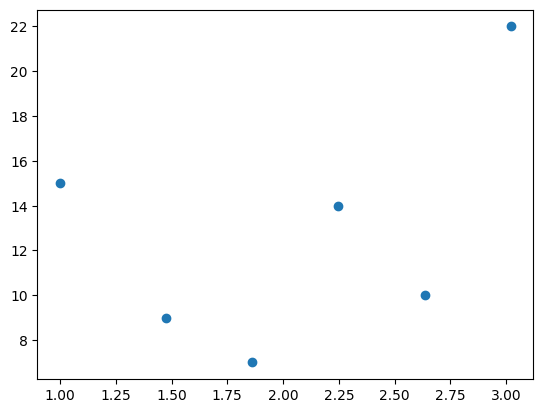

In [149]:
import matplotlib.pyplot as plt

plt.scatter(x,data_points)
plt.show()